[[ 0.0707372 +0.j -0.99749499+0.j]
 [-0.99749499+0.j  0.0707372 +0.j]]


C:\Users\faliq\AppData\Local\Temp\ipykernel_14536\2077914401.py:86: ComplexWarning: Casting complex values to real discards the imaginary part
  psi_in[0]=psit_c[xi]
C:\Users\faliq\AppData\Local\Temp\ipykernel_14536\2077914401.py:87: ComplexWarning: Casting complex values to real discards the imaginary part
  psi_in[1]=psit_c[xi1]
C:\Users\faliq\AppData\Local\Temp\ipykernel_14536\2077914401.py:89: ComplexWarning: Casting complex values to real discards the imaginary part
  psit2_c[xi]=psi_o[0]
C:\Users\faliq\AppData\Local\Temp\ipykernel_14536\2077914401.py:90: ComplexWarning: Casting complex values to real discards the imaginary part
  psit2_c[xi1]=psi_o[1]
C:\Users\faliq\AppData\Local\Temp\ipykernel_14536\2077914401.py:112: ComplexWarning: Casting complex values to real discards the imaginary part
  psit2_c[xi]=psi_o[0]
C:\Users\faliq\AppData\Local\Temp\ipykernel_14536\2077914401.py:113: ComplexWarning: Casting complex values to real discards the imaginary part
  psit2_c[xi1]=psi_o[1]

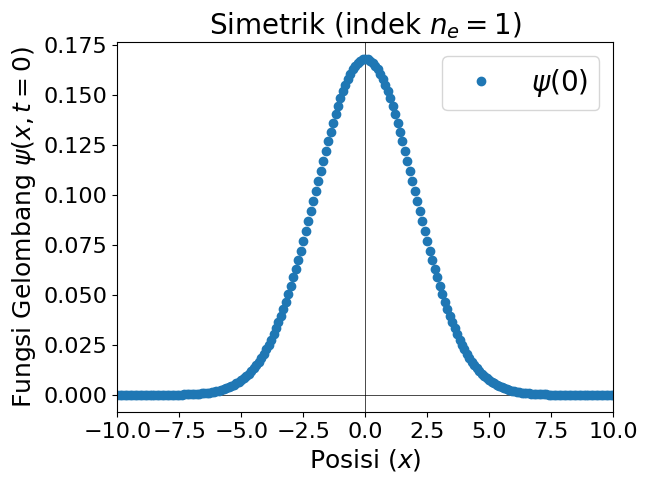

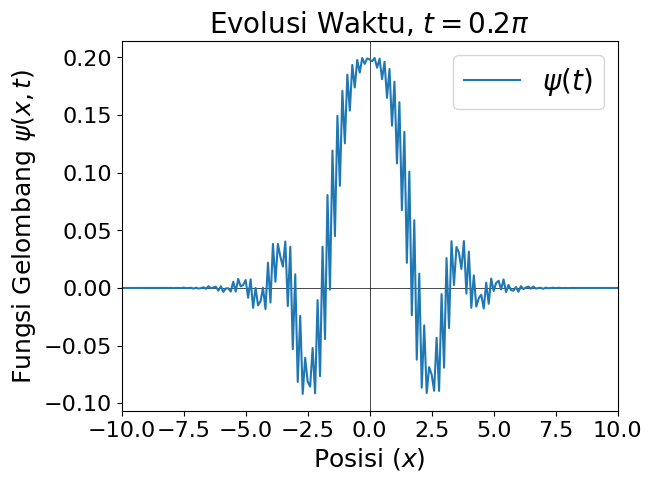

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

n=200           #deklarasi jumlah data point
l=10           #deklarasi nilai x maksimum
n_e=1          #deklarasi bilangan indeks untuk solusi fungsi gelombang simetrik
n_o=1         #deklarasi bilangan indeks untuk solusi fungsi gelombang asimetrik
tau=0.3*np.pi #deklarasi nilai waktu t
ka=1          #deklarasi tetapan k pada potesial osilator harmonik
x0=-l         #deklarasi nilai x yang berada di paling kiri (sumbu x negatif)

h=(l-(-l))/n    #deklarasi nilai interval x
w=1/(2*np.pi*h) #deklarasi nilai W pada pers.Schrodinger yang sudah terdiskretisasi

linex=[]    #deklarasi array/vektor untuk sumbu-x
psi0_c=[]   #deklarasi array/vektor untuk psi(0),jenis data bil.kompleks
psi0_cN=[]  #deklarasi array/vektor untuk psi(0) ternormalisir
psit_c=[]   #deklarasi array/vektor untuk psi(t),jenis data bil.kompleks
Pot_c=[]    #deklarasi array/vektor untuk potensial V(x),jenis data bil.kompleks


#---Blok pembangkitan fungsi gelombang (f.g.) awal, psi(0)---------------------

for i in range(0,(n+1)):
  xi=x0+i*h
  psi0_r=math.sqrt(math.sqrt(1/(np.pi*20*h*20*h)))*math.exp(-(xi-(0))**2/(2*20*h*20*h))
  #psi0_r=np.sqrt(2/l)*np.cos(np.pi*xi*n_e/(2*l)) #f.g. simetrik
  #psi0_r=np.sqrt(2/l)*np.sin(np.pi*xi*n_o/(l))  #f.g. asimetrik
  psi0c=complex(psi0_r,0)
  psi0_c.append(psi0c)
  linex.append(xi)
  #print((linex[i],psi0_c[i]),Pot_c[i])

sumN=np.absolute(np.vdot(psi0_c,psi0_c))  # Menghitung faktor normalisasi psi(0)
psi0_cN=psi0_c/np.sqrt(sumN)              # f.g. awal ternormalisir

#---Blok penentuan jenis potensial V(x)-----------------------------------------
for i in range(0,(n+1)):
  xi=x0+i*h
  pot_r=(0.5)*ka*xi**2     # Potensial osilator harmonik
  #pot_r=0                   # Potensial untuk elekron bebas
  Pot_c.append(pot_r)

#---Below are the first block of matrix multiplication between initial wave----
#---function (psi_o) and matrix block of exp(-i*H0*t/hbar) , i.e. exponential of
#---potential matrix (only diagonal component, other components are zero).
#---Resulting wave function is psi'_o------------------------------
for k in range(0,(n+1)):
  cv=np.cos(Pot_c[k]*tau)
  sv=np.sin(Pot_c[k]*tau)
  H0c=complex(cv,-sv)
  psit_k=H0c*psi0_cN[k]
  psit_c.append(psit_k)

#---Pembuatan matrik blok 2x2 M2 yang akan digunakan terus menerus--------------
#---M2={ct  -ist}
#---   {-ist  ct}

Na=int(n/2)
psit2_c=np.zeros(n+1)
ct=np.cos(abs(w*tau))
st=np.sin(abs(w*tau))
ct_c=complex(ct,0)
st_c=complex(0,st)
M2=np.zeros((2,2),dtype=np.complex_)
M2[0,0]=ct
M2[0,1]=-1*st
M2[1,0]=-1*st
M2[1,1]=ct
print(M2)
psi_in=np.zeros(2)
psi_o=np.zeros(2)

#---Below are the second block of matrix multiplication between initial wave----
#---function (psi_o) and matrix block of exp(-i*H1*t/hbar) , i.e. even index of
#---data point. Resulting wave function is psi''_o------------------------------

for i in range(0,(Na)):
#  psit2_k=ct_c*psit_c[i]-st_c*psit_c[i+1]
#  psit2_k1=st_c*psit_c[i]+ct_c*psit_c[i+1]
#  psit2_c[i].append(psit2_k)
#  psit2_c[i+1].append(psit2_k1)
  xi=2*i
  xi1=2*i+1
  psi_in[0]=psit_c[xi]
  psi_in[1]=psit_c[xi1]
  psi_o=np.matmul(M2,psi_in)
  psit2_c[xi]=psi_o[0]
  psit2_c[xi1]=psi_o[1]
  psit_c[xi]=psit2_c[xi]
  psit_c[xi1]=psit2_c[xi1]


#---Below are the third block of matrix multiplication between psi''_o and  ----
#---matrix block of exp(-i*H2*t/hbar) , i.e. odd index of data point ---
#---resulting wave function is psi'''_o or psi(t)-------------------------------

psi_in[0]=psit_c[0]
psi_in[1]=psit_c[n-1]
psi_o=np.matmul(M2,psi_in)
psit_c[0]=psi_o[0]
psit_c[n-1]=psi_o[1]

for i in range(0,Na-1):
  xi=2*i+1
  xi1=2*i+2

  psi_in[0]=psit_c[xi]
  psi_in[1]=psit_c[xi1]
  psi_o=np.matmul(M2,psi_in)
  psit2_c[xi]=psi_o[0]
  psit2_c[xi1]=psi_o[1]
  psit_c[xi]=psit2_c[xi]
  psit_c[xi1]=psit2_c[xi1]

sumN1=np.absolute(np.vdot(psit2_c,psit2_c)) #Menghitung faktor normalisasi psi(t)
psit2_c=psit2_c/(np.sqrt(sumN1))            #psi(t) ternormalisir

#---  Blok untuk menghitung probabilitas ---------------------------------------
psit2_con=np.zeros(n+1)
Prob=np.zeros(n+1)
psit2_con=np.conjugate(psit2_c)
for i in range(0,n):
  Prob[i]=psit2_con[i]*psit2_c[i]

#---  Blok untuk mem-plot f.g. awal, psi(x,0) ----------------------------------
plt.axhline(color='black', lw=0.5)
plt.axvline(color='black', lw=0.5)
plt.plot(linex,psi0_cN,'o',label='$\psi(0)$')
plt.legend(loc='best',fontsize='20')
plt.xlim([-10,10])
plt.title("Simetrik (indek $n_{e}=1$)",fontsize='20')
#plt.title("Asimetrik (indek $n_{o}=1$)",fontsize='20')
plt.xlabel("Posisi ($x$)",fontsize='18')
plt.ylabel("Fungsi Gelombang $\psi(x,t=0)$",fontsize='18')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

#---  Blok untuk mem-plot f.g. yang sudah berubah terhadap waktu, psi(x,t) -----
plt.axhline(color='black', lw=0.5)
plt.axvline(color='black', lw=0.5)
plt.plot(linex,psit2_c,'-',label='$\psi(t)$')
plt.legend(loc='best',fontsize='20')
plt.xlim([-10,10])
plt.title("Evolusi Waktu, $t=0.2\pi$",fontsize='20')
plt.xlabel("Posisi ($x$)",fontsize='18')
plt.ylabel("Fungsi Gelombang $\psi(x,t)$",fontsize='18')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()
#plt.plot(linex,psit_c,'+')
#plt.plot(linex,psit2_c,'-')
#plt.legend(["$\psi(0)$","$\psi(t)$"],loc='best')






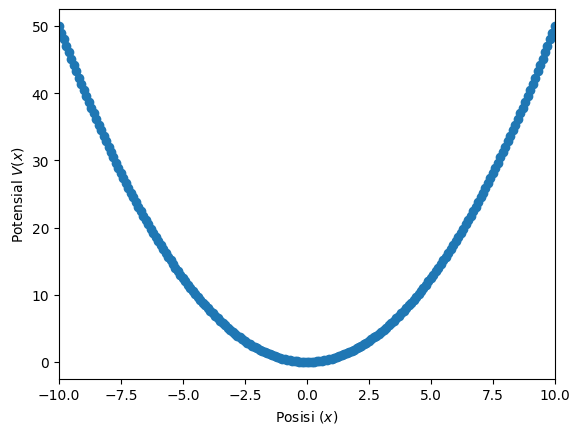

In [2]:
# Plotting Potential
plt.plot(linex,Pot_c,'o')
plt.xlim([-10,10])
plt.xlabel("Posisi ($x$)")
plt.ylabel("Potensial $V(x)$")
plt.show()

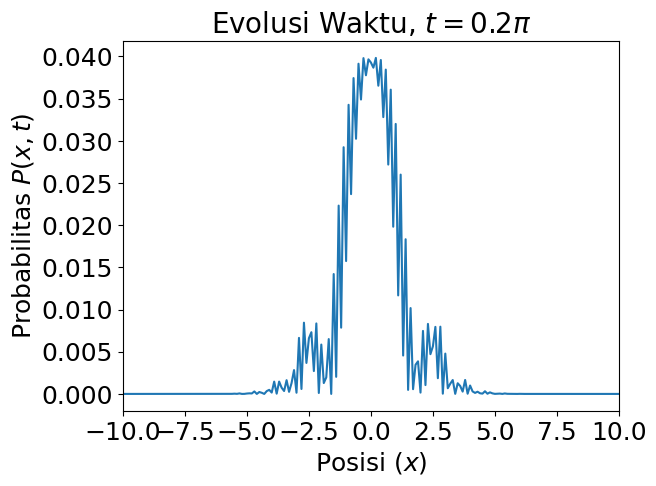

In [3]:
# Plotting Probability
plt.plot(linex,Prob)
plt.xlim([-10,10])
plt.title("Evolusi Waktu, $t=0.2\pi$",fontsize='20')
plt.xlabel("Posisi ($x$)",fontsize='18')
plt.ylabel("Probabilitas $P(x,t)$",fontsize='18')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()
plt.show()